# House Pricing Prediction Portfolio - Notebook 1 of 3

# Part 1 - Defining the problem that needs to be solved

Every one needs an enjoyable, happy place where you can live, laugh and learn. This is usually called HOME. Getting the correct evaluation for a house is very important as it is a major investment that is consequential for both the buyers and sellers.

There are various factors that influence the pricing of a house.

The goal of this portfolio is predicting prices for set of houses with reliable accuracy by examining details of features provided in a train data set.

In [1]:
#Analysis packages
import pandas as pd
import sklearn as sk
import numpy as np
import scipy.stats as sp

#Visualization packages
import matplotlib.pyplot as plt
import matplotlib as matplot
from matplotlib.ticker import MaxNLocator
import seaborn as sns

#Preprocessing
from sklearn import preprocessing

#setting directory where python interpreter looks for code files
import sys
sys.path.insert(0, './scripts')

#read in functions from script file
from codes import data_clean, eda_process, model

from tqdm import tqdm
import datetime

import warnings
warnings.filterwarnings('ignore')
#your info here
__author__ = "Laniya Oladapo"
__email__ = "laniyadapo@gmail.com"

### 1.2 Define Classes

Using OOP - Objective Oriented Programming to create classes for functions used in the project.

Classes are defined in "codes.py" module under "scripts" folder in working directory

## Part 2 - Data Discovery

### 2.1 Load Data

In [2]:
#load the data into a Pandas dataframe
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

### 2.2 Examine & Get Insights on Data 

2.2.1 Inspecting the training dataset

In [3]:
#print the top 5 rows of training data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

In [5]:
#print the descriptive statistics of the numerical data
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#print the descriptive statistics of the categorical data
train_df.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


 Checking for null data in both training and testing datasets and address accordingly

Percentage of missing values in each column:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


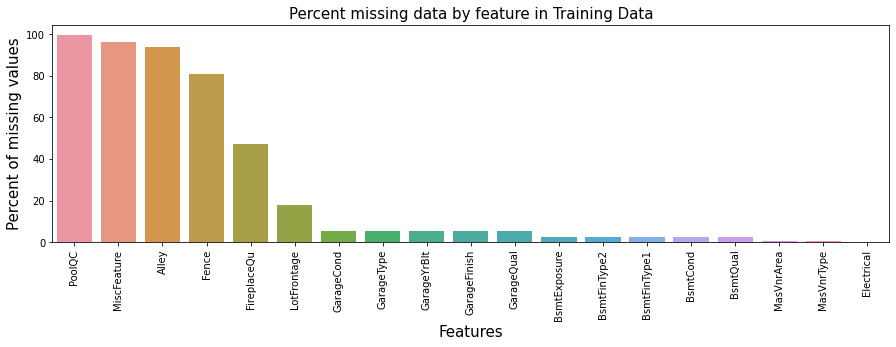

In [7]:
#print the percentage of missing data for columns with missing data in the training dataset
missing_values = data_clean(train_df)
missing_values.perc_missing_data('Training Data')

Observations:

1. The training data has 1460 rows and 81 columns.
2. There are 38 numerical and 43 categorical features.
3. SalePrice is the target variable.
4. There are 19 features with null values in the training data that needs to be investigated and addressed later in the project.

2.2.2 Inspecting the testing dataset

In [8]:
#print the top 5 rows of testing data
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
test_df.shape

(1459, 80)

In [10]:
#print the descriptive statistics of the numerical data
test_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [11]:
#print the descriptive statistics of the categorical data
test_df.select_dtypes(include=['object']).describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


 Checking for null data in testing datasets

Percentage of missing values in each column:
PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageCond       5.35
GarageQual       5.35
GarageYrBlt      5.35
GarageFinish     5.35
GarageType       5.21
BsmtCond         3.08
BsmtQual         3.02
BsmtExposure     3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
BsmtHalfBath     0.14
Utilities        0.14
Functional       0.14
BsmtFullBath     0.14
BsmtFinSF2       0.07
BsmtFinSF1       0.07
Exterior2nd      0.07
BsmtUnfSF        0.07
TotalBsmtSF      0.07
SaleType         0.07
Exterior1st      0.07
KitchenQual      0.07
GarageArea       0.07
GarageCars       0.07
dtype: float64


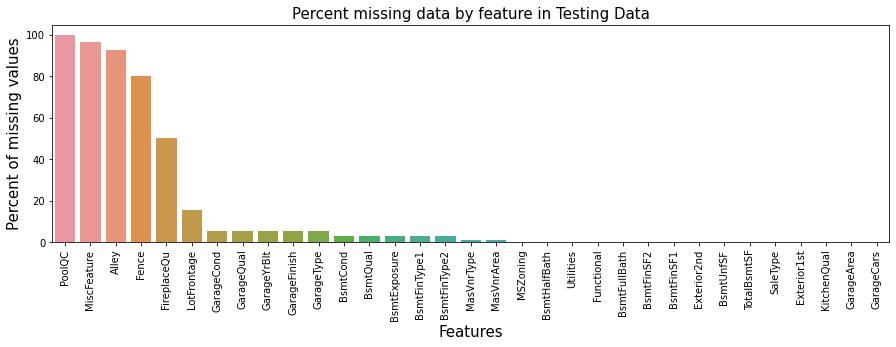

In [12]:
#print the percentage of missing data for columns with missing data in the testing dataset
missing_values = data_clean(test_df)
missing_values.perc_missing_data('Testing Data')

Observations:

1. The training data has 1459 rows and 80 columns.
2. There are 37 numerical and 43 categorical features.
3. There is no target variable in this dataset.
4. There are 33 features with null values in the testing data that needs to be investigated and addressed later in the project.

### 2.3 Cleaning data

2.3.1 Checking for duplicates in both training and testing datasets and dropping applicable column

In [13]:
#Create a copy of data before starting cleaning process
train_df_init = train_df.copy()
test_df_init = test_df.copy()

In [14]:
#Checking for unique values in training data
train_df.nunique().sort_values(ascending=False)

Id              1460
LotArea         1073
GrLivArea        861
BsmtUnfSF        780
1stFlrSF         753
                ... 
BsmtHalfBath       3
Alley              2
Street             2
Utilities          2
CentralAir         2
Length: 81, dtype: int64

In [15]:
#dropping Id column in training dataset (it is not useful for modelling)
train_df.drop(columns =['Id'], inplace=True)
train_df.shape

(1460, 80)

In [16]:
#Checking for unique values in testing data
test_df.nunique().sort_values(ascending=False)

Id            1459
LotArea       1106
GrLivArea      879
BsmtUnfSF      793
1stFlrSF       789
              ... 
PoolQC           2
CentralAir       2
Alley            2
Street           2
Utilities        1
Length: 80, dtype: int64

In [17]:
#dropping Id column in testing dataset (it is not useful for modelling)
test_df.drop(columns =['Id'], inplace=True)
test_df.shape

(1459, 79)

2.3.2 Dealing with identified null data in both training and testing datasets.

Different approaches will be applied to columns after further investigation fo the data with null values:
     1. Columns where missing values actually mean None. Null values will be replaced with "None".
     2. Numerical columns where missing values actually mean 0. Null values will be replaced with "0".
     3. Columns that missing data is not possible and low number of missing data. Null values to be filled with column mode.
     4. Critical data that can be related with another column. Null values to be filled with mode value of the highly correlable column. 

2.3.2.1 Fixing Null Values in Training Dataset

In [18]:
#Null value Clean up Approach 1 applied in training dataset
None_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
none_replace = data_clean(train_df)
none_replace.deal_null_values(None_cols, 'None')

In [19]:
#Null value Clean up Approach 2 applied in training dataset
zero_cols = ['GarageYrBlt', 'MasVnrArea']
none_replace = data_clean(train_df)
none_replace.deal_null_values(zero_cols, 0)

In [20]:
#Null value Clean up Approach 3 applied in training dataset
freq_cols = ['Electrical']
none_replace = data_clean(train_df)
none_replace.deal_null_values(freq_cols, train_df['Electrical'].mode()[0])

In [21]:
#Null value Clean up Approach 4 applied in training dataset Filling 'LotFrontage' according to Neighborhood.
train_df['LotFrontage'] = train_df.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

2.3.2.2 Fixing Null Values in Testing Dataset

In [22]:
#Null value Clean up Approach 1 applied in testing dataset
None_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
none_replace = data_clean(test_df)
none_replace.deal_null_values(None_cols, 'None')

In [23]:
#Null value Clean up Approach 2 applied in testing dataset
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']
none_replace = data_clean(test_df)
none_replace.deal_null_values(zero_cols, 0)

In [24]:
#Null value Clean up Approach 3 applied in testing dataset
freq_cols = ['Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities']
none_replace = data_clean(test_df)
none_replace.deal_null_values_freq(freq_cols)

In [25]:
#Null value Clean up Approach 4 applied in training dataset Filling 'LotFrontage' according to Neighborhood.
test_df['LotFrontage'] = test_df.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [26]:
test_df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [27]:
test_df['MSZoning'] = test_df['MSZoning'].fillna('RL')

2.3.3 Visualize data to check and remove invalid target data

2.3.3.1 Plotting target variable to identify outliers

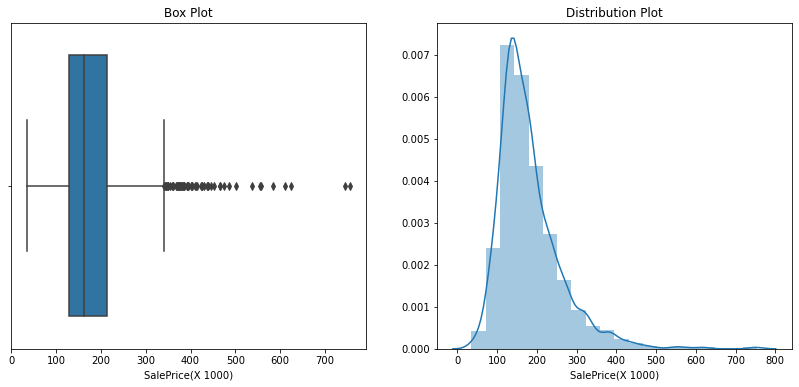

In [28]:
Target_plot = data_clean(train_df.SalePrice)
Target_plot.target_visual('SalePrice')

In [29]:
# Identify potential outliers
info = train_df.SalePrice.describe()
print(info)
IQR = info['75%'] - info['25%']
upper = info['75%'] + 1.5 * IQR
lower = info['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
The upper and lower bounds for suspected outliers are 340037.5 and 3937.5.


Observation(s):

1. Outliers above the upper bound are identified and need to be investigated. 

2.3.3.2 Investigate identified outliers

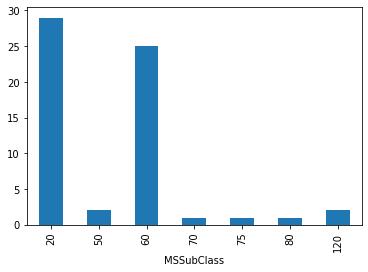

In [30]:
#Plot MSSubClass counts for the data above upper bound
train_df[train_df.SalePrice > 340037.5].groupby(['MSSubClass']).size().plot.bar()

Observation(s):

1. The 61 properties with SalePrice higher than the upper bounds are mostly in MSSubClass - 20 & 60.

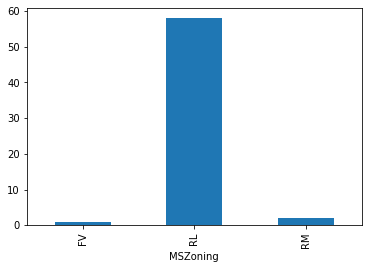

In [31]:
#Plot MSZoning counts for the data above upper bound
train_df[train_df.SalePrice > 340037.5].groupby(['MSZoning']).size().plot.bar()

Observation(s):

1. The 61 properties with SalePrice higher than the upper bounds are mostly in Residential Low Density (RL) MSZoning.

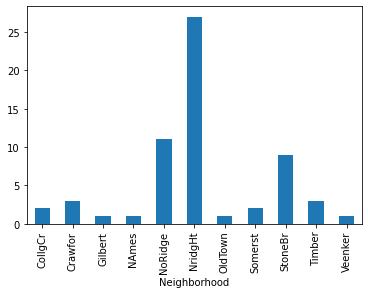

In [32]:
#Plot Neighborhood counts for the data above upper bound
train_df[train_df.SalePrice > 340037.5].groupby(['Neighborhood']).size().plot.bar()

Observation(s):

1. The 61 properties with SalePrice higher than the upper bounds are mostly in Residential Low Density areas in NridgHt, NoRidge & StoneBr Neighborhoods.

In [33]:
#Apply Quartile Binning to LotArea to create plot of the count for the data beyond the upper bound
train_df['LotArea_range'] = pd.qcut(train_df.LotArea, 4)
train_df['LotArea_label'] = pd.qcut(train_df.LotArea, 4, labels=['low', 'medium', 'high', 'very high'])

train_df[['LotArea', 'LotArea_range', 'LotArea_label']].head()

,LotArea,LotArea_range,LotArea_label
0,8450,"(7553.5, 9478.5]",medium
1,9600,"(9478.5, 11601.5]",high
2,11250,"(9478.5, 11601.5]",high
3,9550,"(9478.5, 11601.5]",high
4,14260,"(11601.5, 215245.0]",very high


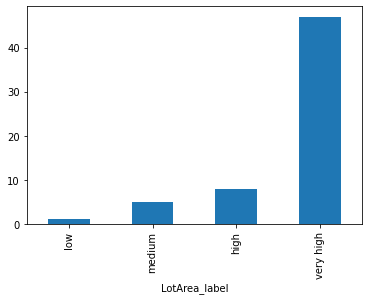

In [34]:
#Plot labelled LotArea counts for the data above upper bound
train_df[train_df.SalePrice > 340037.5].groupby(['LotArea_label']).size().plot.bar()

Observation(s):

1. The 61 properties with SalePrice higher than the upper bounds are mostly are on LotAreas larger than the mean LotArea size

In [35]:
#dropping the created features in training dataset (it is not useful for modelling)
train_df.drop(columns =['LotArea_range', 'LotArea_label'], inplace=True)
train_df.shape

(1460, 80)

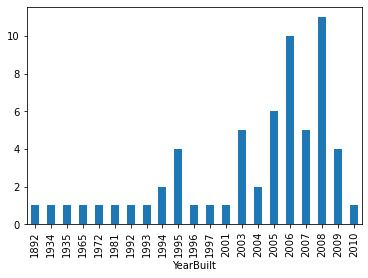

In [36]:
train_df[train_df.SalePrice > 340037.5].groupby(['YearBuilt']).size().plot.bar()

Observation(s):

1. The 61 properties with SalePrice higher than the upper bounds are mostly built in the 2000s.
2. Based on above observations we will not be dropping the 61 rows of data.

2.3.4 Checking numerical features for outliers using the bivariate analysis method

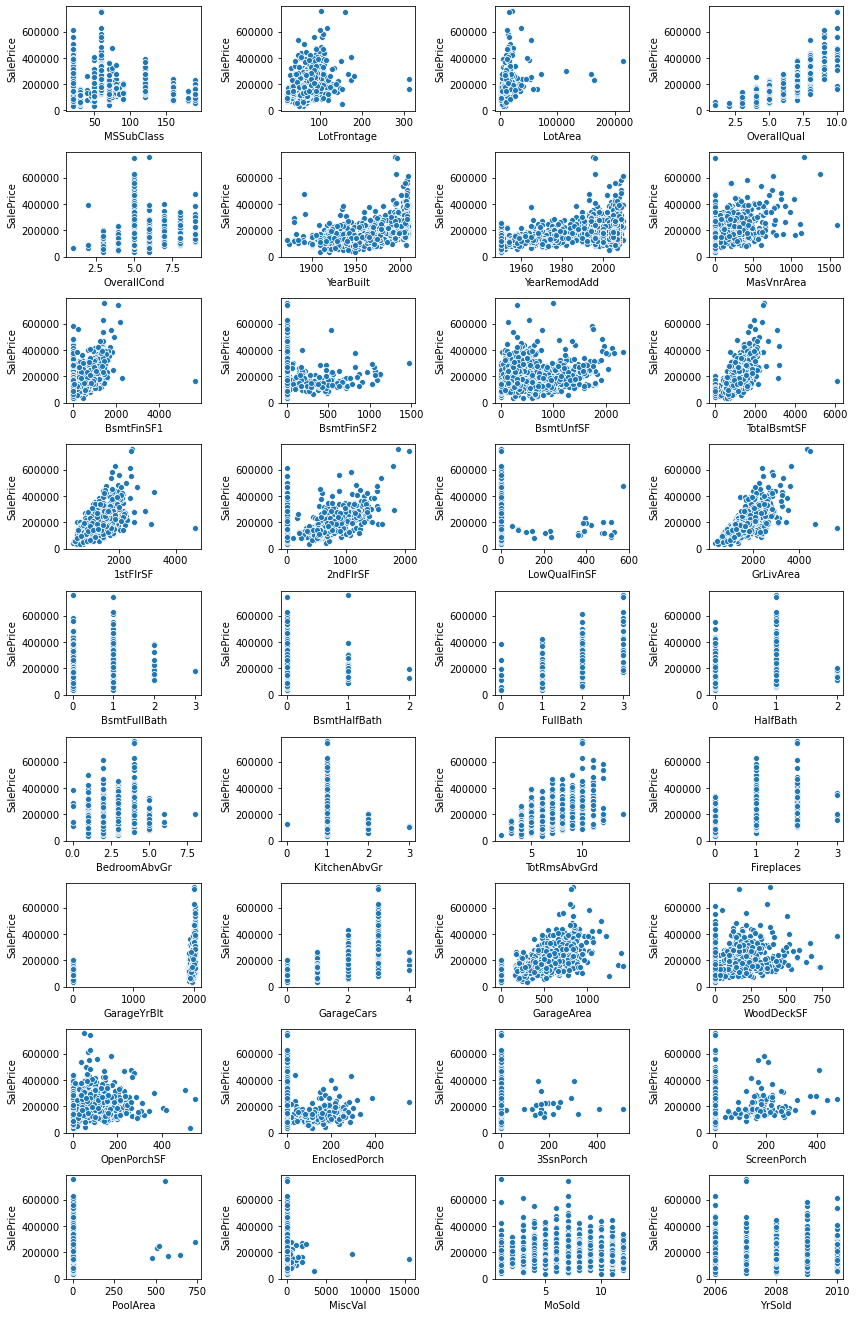

In [37]:
#Numeric features inspection for outliers
num_bivariate_plot = data_clean(train_df)
num_bivariate_plot.num_features_outliers()

Observations:
1. Following features appear to have outliers based on scatter plots above.
   - LotFrontage (> 200), Lot Area (> 100000), BsmtFinSF1 (> 4000), TotalBsmtSF (>4000), 1stFlrSF (> 4000)

2.3.4.1 Dropping identified outliers from training data

In [38]:
#dropping identified outliers 
train_df = train_df.drop(train_df['LotFrontage'][train_df['LotFrontage']>200].index)
train_df = train_df.drop(train_df['LotArea'][train_df['LotArea']>100000].index)
train_df = train_df.drop(train_df['BsmtFinSF1'][train_df['BsmtFinSF1']>4000].index)
train_df = train_df.drop(train_df['TotalBsmtSF'][train_df['TotalBsmtSF']>4000].index)
train_df = train_df.drop(train_df['1stFlrSF'][train_df['1stFlrSF']>4000].index)
train_df.shape

(1454, 80)

In [39]:
#Exporting the cleaned training and testing dataset to a csv file to use in EDA Notebook
train_df.to_csv('train_df_forEDA.csv', index=False)
test_df.to_csv('test_df_forEDA.csv', index=False)

### The project will be continued in the "House Pricing Prediction EDA Notebook". See link below.

https://github.com/laniyadapo/housepricingportfolio/blob/master/House%20Pricing%20Prediction%20EDA%20Notebook.ipynb